# Image preprocessing, division in patches

In [1]:
import data_reader
import dataset

import matplotlib.pyplot as plt
import numpy as np

C:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = r"C:\Users\Alejandro\Desktop\heterogeneous-data\data\gdc_download_20220427_144600.480657"

case_id = os.listdir(data_path)[:2]

paths = [data_path + "\\" + case for case in case_id] # All case folders paths

paths = paths # Number of cases


In [3]:
data_r = data_reader.Data_reader(
    folder_name="gdc_download_20220427_144600.480657", 
    np_shape=(299,299), 
    formats=[".svs"])

data_r.read_data(
    paths, 
    patch_size=300, 
    dataset='train')

100%|██████████| 2/2 [00:00<00:00, 100.33it/s]

00258f72-d70d-4155-847b-7d60bc21e82a
Empty DataFrame
Columns: [case_id, case_submitter_id, project_id, age_at_index, age_is_obfuscated, cause_of_death, cause_of_death_source, country_of_residence_at_enrollment, days_to_birth, days_to_death, ethnicity, gender, occupation_duration_years, premature_at_birth, race, vital_status, weeks_gestation_at_birth, year_of_birth, year_of_death, adrenal_hormone, age_at_diagnosis, ajcc_clinical_m, ajcc_clinical_n, ajcc_clinical_stage, ajcc_clinical_t, ajcc_pathologic_m, ajcc_pathologic_n, ajcc_pathologic_stage, ajcc_pathologic_t, ajcc_staging_system_edition, anaplasia_present, anaplasia_present_type, ann_arbor_b_symptoms, ann_arbor_b_symptoms_described, ann_arbor_clinical_stage, ann_arbor_extranodal_involvement, ann_arbor_pathologic_stage, best_overall_response, breslow_thickness, burkitt_lymphoma_clinical_variant, child_pugh_classification, circumferential_resection_margin, classification_of_tumor, cog_liver_stage, cog_neuroblastoma_risk_group, cog_re

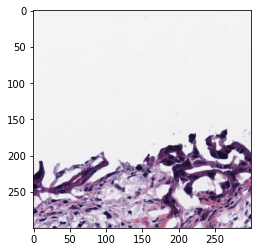

In [4]:
example = data_r.data

plt.imshow(example['train']['00258f72-d70d-4155-847b-7d60bc21e82a'][0][0][2]) # [imagen][(x,y)][patch]


Number of samples:  23259


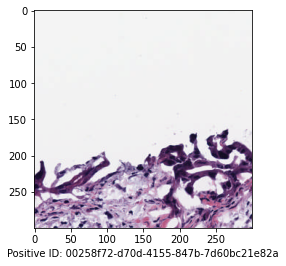

In [17]:
import dataset

example_data_set = data_r.data_reader_to_dataset(case_id)

print("Number of samples: ", example_data_set.__len__())
fig, ax = plt.subplots()

ex = example_data_set.__getitem__(2)

if ex[1] == 1:
    ax.set_xlabel(f"Positive ID: {ex[2]}")
else:
    ax.set_xlabel(f"Negative ID: {ex[2]}")

ax.imshow(ex[0])

In [18]:
print(np.sum(example_data_set.labels)/len(example_data_set.labels))

0.9295756481362053
